In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr

matplotlib.rcParams.update({'font.size': 14})
import dedalus.public as d3

import logging
logging.disable()

In [3]:
import sys
sys.path.append("../../src/")
from bfzi.helpers import *
from bfzi.linear_instability import *

In [102]:
dsf = xr.open_dataarray("../../data/growth_rates/Ri_dependence_frictional.nc")
dsi = xr.open_dataarray("../../data/growth_rates/Ri_dependence_inviscid.nc")

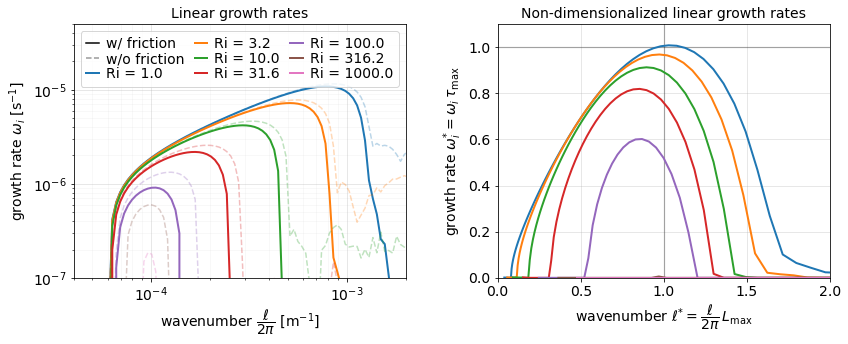

In [170]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.grid(True, alpha=0.3, lw=1, which="major")
plt.grid(True, alpha=0.1, which="minor")
plt.plot([],[],"k-", label="w/ friction")
plt.plot([],[],"k--", alpha=0.4, label="w/o friction")
for Ri in dsf.Ri:
    p = plt.plot(
        dsf.wavenumber, dsf.sel(Ri=Ri), lw=2,
        label=f"Ri = {np.round(Ri.values, 1)}"
    )
    plt.plot(
        dsi.wavenumber, dsi.sel(Ri=Ri),
        color = p[0].get_color(),
        linestyle="--", alpha=0.3
    )
plt.xlim(4e-5, 2e-3)
plt.ylim(1e-7, 5e-5)
plt.xlabel(r"wavenumber $\dfrac{\ell}{2\pi}$ [m$^{-1}$]")
plt.ylabel(r"growth rate $\omega_{i}$ [s$^{-1}$]")
plt.xscale("log")
plt.yscale("log")
plt.title("Linear growth rates", fontsize=14);
plt.legend(labelspacing=0.09, handlelength=0.9, loc="upper left", handletextpad=0.5, columnspacing=0.75, ncol=3)

plt.subplot(1,2,2)
plt.axhline(1., color="k", alpha=0.3, lw=1.2)
plt.axvline(1., color="k", alpha=0.3, lw=1.2)
plt.grid(True, alpha=0.3, lw=1, which="major")
for Ri in dsf.Ri.values:
    M = calc_M_from_Ri(Ri, N, f, θ)
    Lmax = calc_Lmax(calc_Nbfz(N, M, θ), Hbfz, f, Ri)
    τmax = calc_td(f, Ri)
    plt.plot(
        dsf.wavenumber * Lmax, dsf.sel(Ri=Ri) * τmax, lw=2
    )
plt.xlabel(r"wavenumber $\ell^{*} = \dfrac{\ell}{2\pi} \, L_{\max}$")
plt.ylabel(r"growth rate $\omega_{i}^{*} = \omega_{i} \, \tau_{\max}$")
plt.xlim(0, 2)
plt.ylim(0., 1.1)
plt.title("Non-dimensionalized linear growth rates", fontsize=14);

plt.tight_layout()
plt.savefig("../../figures/BFZ_linear_Ri.png", dpi=150, bbox_inches="tight")

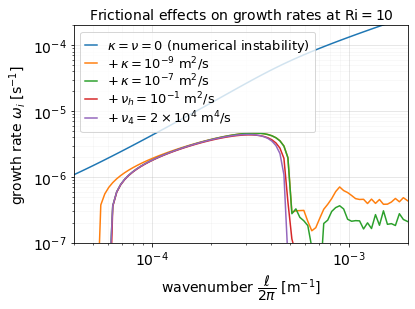

In [171]:
ds = xr.open_dataset("../../data/growth_rates/Ri=10_frictional_dependence.nc")

plt.figure(figsize=(6,4))
plt.grid(True, alpha=0.3, lw=1, which="major")
plt.grid(True, alpha=0.1, which="minor")
ds['inviscid'].plot(label=r"$\kappa = \nu = 0$ (numerical instability)")
ds['k0'].sel(friction_scaling=0.01).plot(label=r"$+\, \kappa = 10^{-9}$ m$^{2}$/s")
ds['k0'].sel(friction_scaling=1).plot(label=r"$+\, \kappa = 10^{-7}$ m$^{2}$/s")
ds['nuh'].sel(friction_scaling=1).plot(label=r"$+\, \nu_{h} = 10^{-1}$ m$^{2}$/s")
ds['nu4'].sel(friction_scaling=1).plot(label=r"$+\, \nu_{4} = 2\times 10^{4}$ m$^{4}$/s")
plt.xlim(4e-5, 2e-3)
plt.ylim(1e-7, 2e-4)
plt.xlabel(r"wavenumber $\dfrac{\ell}{2\pi}$ [m$^{-1}$]")
plt.ylabel(r"growth rate $\omega_{i}$ [s$^{-1}$]")
plt.xscale("log")
plt.yscale("log")
plt.title("Frictional effects on growth rates at Ri$= 10$", fontsize=14);
plt.legend(labelspacing=0.01, handlelength=0.9, loc="upper left", fontsize=13)

plt.savefig("../../figures/BFZ_linear_friction.png", dpi=150, bbox_inches="tight")